<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> CIENCIA DE DATOS E INTELIGENCIA DE NEGOCIOS </font> </center>

# <center> <font color= #000047> Tarea 3: Aprendizaje No Superviado: Clustering </font> </center>


<h1> José Eddie Aguilar Ceballos </h1>
<hr>   

Clustering es el proceso de agrupar datos en clases o clusters de tal forma que los objetos de un cluster tengan una similaridad alta entre ellos, y baja (sean muy diferentes) con objetos de otros clusters. Esta metodología puede ser aplicada, por ejemplo, para caracterizar clientes, formar taxonom´ıas, clasificar documentos, etc. Esta tarea consiste en aplicar los conocimientos de los algoritmos de clustering vistos en clase para analizar y segmentar un conjunto de datos que contiene información sobre los montos de gasto anual de varios clientes (informados en unidades monetarias) de diversas categorías de productos. 

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> En cada figura, tabla, o resultado que se incluya, se debe de incluir el código que se utilizó para obtenerlo.  <br> Todas las figuras (si las hubiera) deben de estar comentadas o descritas.</div>

#### 1. Considere el dataset que se encuentra en la carpeta Data "wholesale custoers data.csv". Realizar lo siguiente:

> Hacer drop de las columnas ['Region', 'Channel'].

> Realizar un reporte de calidad de datos.

> Realizar un Análisis Exploratorio de Datos y obtener 3 insights.


In [49]:
import matplotlib.pyplot as pt
import pandas as pd
import numpy as np 
from CDIN import CDIN as cd
import scipy.cluster.hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
colors = ["red", "blue", "orange", "yellow", "green", "red"]

data = pd.read_csv('../Data/Wholesale customers data.csv')
data.drop(columns=["Region", "Channel"], inplace=True)

cd.dqr(data)

,Nombre_Columnas,Tipo_Datos,Valores_Presentes,Valores_Faltantes,Valores_Unicos,Max_Values,Min_Values,Mean,Std,Categorical,Categories
Fresh,Fresh,int64,440,0,433,112151,3,12000.298,12647.329,False,NaN
Milk,Milk,int64,440,0,421,73498,55,5796.266,7380.377,False,NaN
Grocery,Grocery,int64,440,0,430,92780,3,7951.277,9503.163,False,NaN
Frozen,Frozen,int64,440,0,426,60869,25,3071.932,4854.673,False,NaN
Detergents_Paper,Detergents_Paper,int64,440,0,417,40827,3,2881.493,4767.854,False,NaN
Delicassen,Delicassen,int64,440,0,403,47943,3,1524.870,2820.106,False,NaN


<BarContainer object of 6 artists>

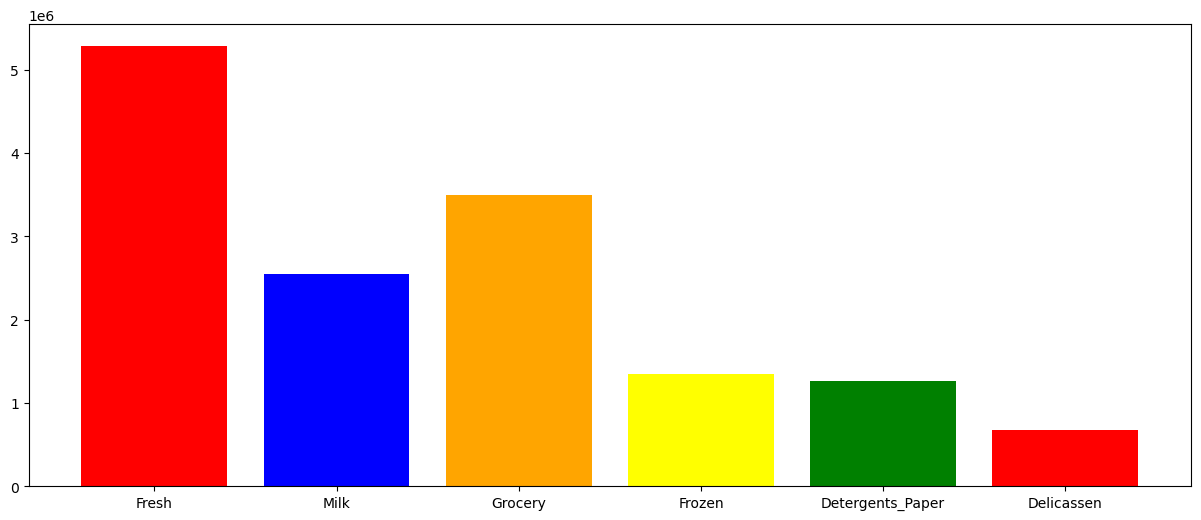

In [31]:
pt.figure(figsize=(15, 6))
pt.bar(data.columns, data.sum().tolist(), color = colors)

- Insight: Vemos que los dos más vendidos son Fresco y Abarrotes, se usarán en uno de los siguientes puntos. 
- Insight: El menos vendido/comprado es Delicassen, también se usará en otro punto.

Text(0.5, 1.0, 'Grocery vs Fresh')

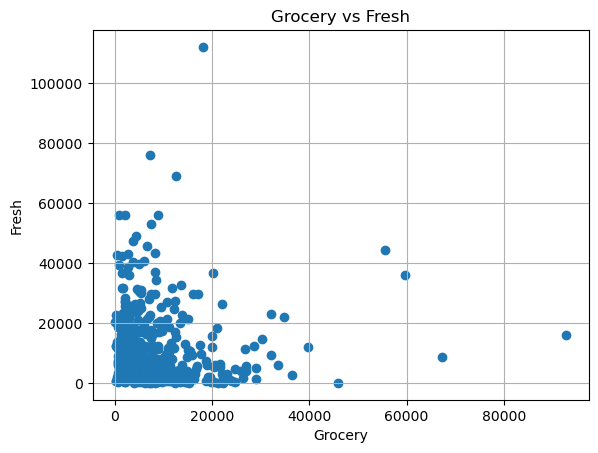

In [36]:
pt.scatter(data.values[:,2], data.values[:,0])
pt.grid()
pt.xlabel('Grocery')
pt.ylabel('Fresh')
pt.title('Grocery vs Fresh')

- Insight: Vemos la distribución de Abarrotes contra Fresco, los dos más comprados, vemos como, por lo general, se suele comprar más del uno que del otro, en lugar de seguir un movimiento más correlacionado. 

#### 2. Después de realizar el EDA, escoja las características más importantes (Columnas) que crea para poder realizar la segmentación de los clientes con el algoritmo de Clustering Jerárquico. 

> Obtenga el dendograma

> Mediante el criterio del codo y del dendograma concluya número de grupos óptimo para realizar la segmentación. Comenta tus resultados.

> Elija al menos 3 variables para la visualización de la clusterización y comente sus resultados.

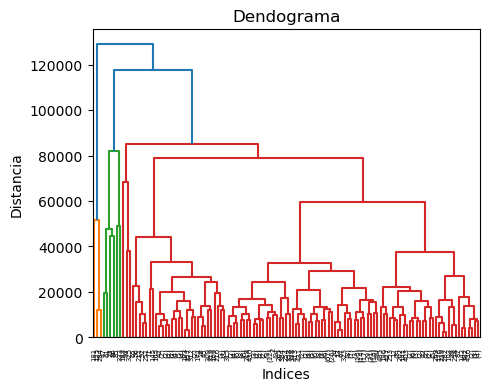

In [44]:
pt.figure(figsize=(5, 4))
den = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(data, metric = 'euclidean', method= 'complete'), truncate_mode='level', p=10)

pt.title("Dendograma")
pt.xlabel("Indices")
pt.ylabel("Distancia")
pt.show()


Por resultado del dendograma, Clusters: 4

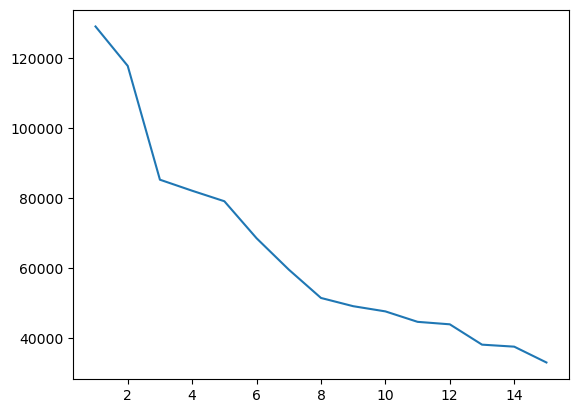

In [45]:
z = scipy.cluster.hierarchy.linkage(data, metric = 'euclidean', method= 'complete')
last = z[-15:,2][::-1]
index = np.arange(1, 15 + 1)

pt.plot(index, last)

Entre el grupo 3 y 4 se encuentra la mayor diferencia en distancia, a partir del octavo es más lineal. 

#### Usando 3:

Text(0.5, 0, 'Grocery')

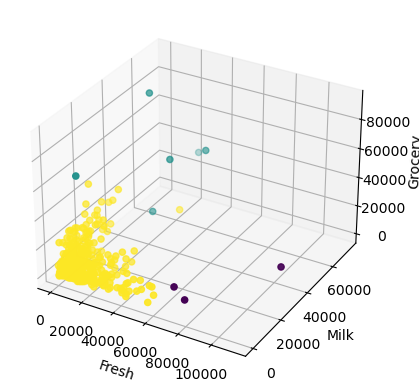

In [48]:

groups  = scipy.cluster.hierarchy.fcluster(z, 3, criterion= "maxclust")
axes = pt.axes(projection = '3d')

axes.scatter3D(data.values[:,0],data.values[:,1],data.values[:,2], c=groups)
axes.set_xlabel("Fresh")
axes.set_ylabel("Milk")
axes.set_zlabel("Grocery")

Viendo los dos más vendidos y milk, vemos que el comportamiento es muy similar. 

Concetrado en poca compra en fresh, milk y moderada en abarrotes. 

#### 3. Aplica el algoritmo Kmeans para los datos con las características más importantes que haya elegido. 

> Mediante el criterio del codo y el gradiente obten el número óptimo de grupos. 

> Ejecuta nuevamente el algoritmo de Kmeans con el número óptimo de grupos encontrado y escoge 3 variables para visualizar la segmentación y los centroides.

c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

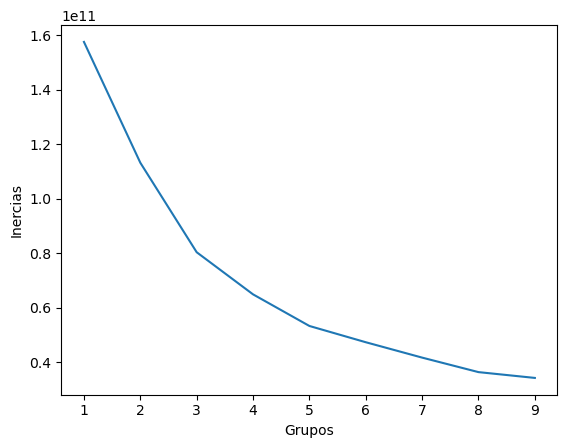

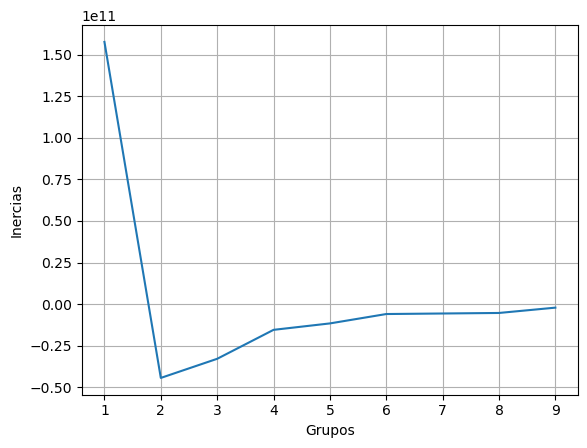

In [53]:
n = 10
inercias = np.zeros(n)

for i in np.arange(1, n):
    model = KMeans(n_clusters=i, random_state=5, init='random')
    model = model.fit(data)
    inercias[i] = model.inertia_

pt.plot(np.arange(1,n),inercias[1:])
pt.xlabel('Grupos')
pt.ylabel('Inercias')
pt.show()

gradiente = np.diff(inercias)

pt.plot(np.arange(1,n),gradiente)
pt.xlabel('Grupos')
pt.ylabel('Inercias')
pt.grid()
pt.show()

Grupos: 4

c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 0, 'Delicassen')

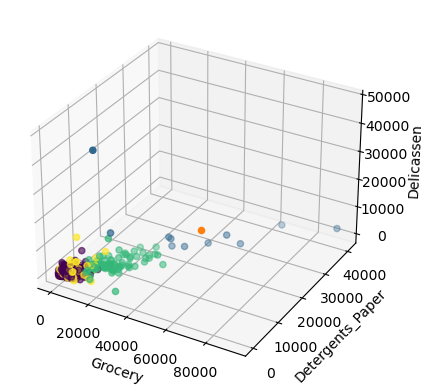

In [59]:
n=4
model = KMeans(n_clusters=n, random_state=5, init='random').fit(data)
centroides = model.cluster_centers_
groups = model.predict(data)
axes = pt.axes(projection = '3d')

axes.scatter3D(data.values[:,2],data.values[:,4],data.values[:,5], c=groups)
for i in centroides:
    axes.scatter3D(i[2],i[4],i[5], '*r')

axes.set_xlabel('Grocery')
axes.set_ylabel('Detergents_Paper')
axes.set_zlabel('Delicassen')

Ahora tomando en cuenta el menos vendido, el más y dtergente, vemos que siguen estando agroupados como ya lo habíamos observado. Vemos que hay dos grupos muy cercanos.

Entonces, confirmamos los analisis anteriores, que decían que también podemos usar 3 grupos. 

#### 4. Investiga el método de silhouette para la elección de los número óptimos en Kmeans y realiza el análisis de elección de grupos con este método

El método de la silueta se denomina así porque utiliza el coeficiente de la Silhouette. Éste se define como la diferencia entre la distancia media a los elementos del clúster más cercano y a distancia intra-clúster media de los elementos de un clúster dividido por el máximo de los dos.

c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AgJo413\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[0.5115, 0.477, 0.3866, 0.3696, 0.3189]


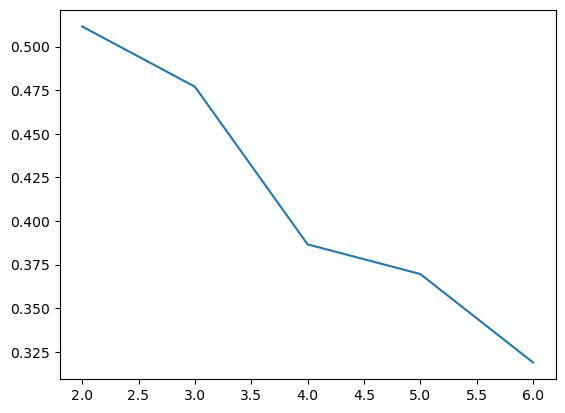

In [62]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
clusters = 6

for k in range(2, clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=5, init='random')
    labels = kmeans.fit_predict(data)
    silhouette_avg = round(silhouette_score(data, labels),4)
    silhouette_scores.append(silhouette_avg)
    
print(silhouette_scores)
pt.plot([2, 3, 4, 5, 6], silhouette_scores)

Clusters: 2